In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
import os
from matplotlib.font_manager import FontProperties
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')
fontP = FontProperties()
fontP.set_size('xx-small')

In [2]:
figpath =  os.path.join(os.getcwd(),"figures")

In [3]:
filename = librosa.example("nutcracker")

In [4]:
y,sr  =  librosa.load(filename)

In [5]:
ipd.Audio(filename)

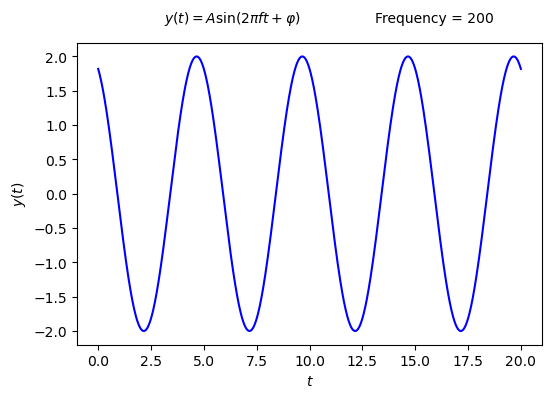

In [6]:
phi =  2.0
t =  np.linspace(0,20, 1000)
f =  np.arange(20,200+1,1)
A =  2.0
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
for i in range(len(f)):
    y_t =  A * np.sin( 2*np.pi  * f[i] * t + phi)
    plt.plot(t,y_t,c='blue')
    plt.text(13.1,2.5,f'Frequency = {f[i]}')
    ax.text(3.1,2.5,r'$y(t) =  A \sin(2\pi ft + \varphi) $')
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$y(t)$")
    camera.snap()
# plt.show()
animation = camera.animate(blit=False)
HTML(animation.to_html5_video())

In [7]:
animation.save(f'{figpath}/simple_wave.mp4',dpi=100,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})

In [8]:
# !ffmpeg -i '/net/store/cv/users/ybrima/RTGCompCog/Exp/figures/simple_wave.mp4' -filter:v fps=fps=30 '/net/store/cv/users/ybrima/RTGCompCog/Exp/figures/simple_wave.gif'

In [9]:
f =  lambda A,t,phi: A * np.sin( 2*np.pi  * f * t + phi)

In [11]:
def wave(A,f,phi):
    t =  np.linspace(0,20, 1000)
    plt.figure(figsize=(10,6))
    y_t =  A * np.sin( 2*np.pi  * f * t + phi)
    plt.plot(t,y_t, label=fr"$A=${A} $\varphi$ = {phi} and $f=$ {f}")
    plt.legend(loc='upper right')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$y(t)$")
    plt.savefig(f'{figpath}/simple_wave.png',dpi=100)
    plt.show()

interactive_plot = interactive(wave, A=(0, 4.0), phi=(0, 4, 0.5),f=(100,4100))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='A', max=4.0), IntSlider(value=2100, description='f',…

In [47]:
F =  lambda p: np.power(2, (p - 69)/12) * 440

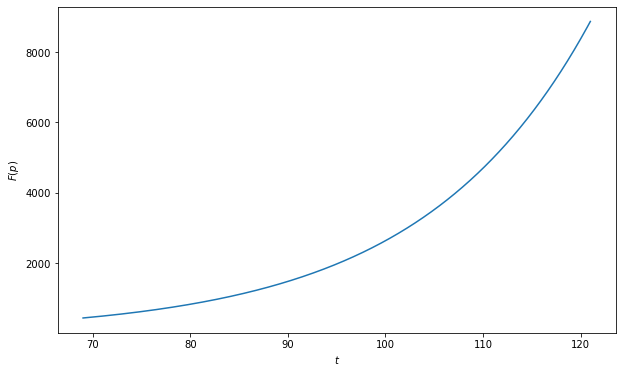

In [48]:
p =  np.linspace(69,121, 1000)
plt.figure(figsize=(10,6))
f =  F(p)
plt.plot(p,f)
plt.xlabel(r"$t$")
plt.ylabel(r"$F(p)$")
plt.savefig(f'{figpath}/pitch_frequency.png',dpi=100)
plt.show()

In [49]:
f[1]/f[0]

1.003011168915581